In [5]:
import pandas as pd

In [3]:
#Importing the data
targets = pd.read_csv('/Users/nupuragrawal/downloads/tempus_data_science_case_study/targets.csv')
biomarkers=pd.read_csv('/Users/nupuragrawal/downloads/tempus_data_science_case_study/biomarkers.csv')

In [13]:
import json
#open the file
df = pd.read_json('/Users/nupuragrawal/downloads/tempus_data_science_case_study/patient_profiles.json', orient='columns')
df
      
# tempdf = pd.DataFrame(l)
# df = pd.concat([tempdf.drop('mid', axis=1), tempdf['mid'].apply(pd.Series)], axis=1)

,institution,cohort_id,patient_profiles
0,Saint Penelope Medical Center,14562556998,"[{'patient_id': '102bb8fae', 'demographics': {..."
1,"BioLab, Inc.",14562556998,"[{'patient_id': '100688fb9', 'demographics': {..."
2,University Hospital System,14562556998,"[{'patient_id': '1002df1d3', 'demographics': {..."
3,Goodfellow Research Institute,14562556998,"[{'patient_id': '104fc5e3c', 'demographics': {..."
4,Montague Hospital,14562556998,"[{'patient_id': '1010441f', 'demographics': {'..."
5,Johnson & Bloom Hospitals,14562556998,"[{'patient_id': '103278b88', 'demographics': {..."
6,Medical Information Exchange,14562556998,"[{'patient_id': '1002cb1e8', 'demographics': {..."


In [5]:
targets

,patient_id,biomarker_id,target_label
0,1002df1d3,89c43bb4,0
1,1010441f,3ae31327,0
2,101eb6af1,1d8f7bab9,0
3,10204394e,129ee8c6c,0
4,1021d329b,1b44145bd,0
...,...,...,...
1729,f935591e,5f456337,1
1730,fa4be3df,1b4e0b08f,1
1731,fd416b4b,c8c12c4a,1
1732,fdaeb5f1,222e21be2,1


In [6]:
biomarkers

,biomarker_id,BM00000,BM00001,BM00002,BM00003,BM00004,BM00005,BM00006,BM00007,BM00008,...,BM15147,BM15148,BM15149,BM15150,BM15151,BM15152,BM15153,BM15154,BM15155,BM15156
0,100505de2,1,1,1,0,0,0,1,0,0,...,1,0,1,1,0,0,1,1.0,1,1
1,10075c5c2,1,1,1,0,0,0,1,0,1,...,1,0,0,0,0,0,1,NaN,1,1
2,10105cb22,1,1,1,0,0,0,1,0,1,...,1,0,0,0,0,0,1,NaN,1,1
3,101219d6e,1,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,1,1.0,1,1
4,10135ad45,1,0,1,0,1,0,1,0,1,...,1,0,1,0,0,0,1,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1955,feaf2df,1,1,1,0,0,0,1,0,0,...,1,0,1,0,0,0,1,1.0,1,1
1956,ff65d86c,1,1,1,0,1,0,0,0,1,...,1,0,1,0,0,0,1,1.0,1,1
1957,ff9361bb,1,1,1,0,1,0,1,0,1,...,1,0,1,0,0,0,1,1.0,1,1
1958,ffaae762,0,1,1,0,1,1,1,0,1,...,1,0,1,0,1,0,1,1.0,1,1


In [7]:
patient_profiles.head(10)

,institution,cohort_id,patient_profiles
0,Saint Penelope Medical Center,14562556998,"[{'patient_id': '102bb8fae', 'demographics': {..."
1,"BioLab, Inc.",14562556998,"[{'patient_id': '100688fb9', 'demographics': {..."
2,University Hospital System,14562556998,"[{'patient_id': '1002df1d3', 'demographics': {..."
3,Goodfellow Research Institute,14562556998,"[{'patient_id': '104fc5e3c', 'demographics': {..."
4,Montague Hospital,14562556998,"[{'patient_id': '1010441f', 'demographics': {'..."
5,Johnson & Bloom Hospitals,14562556998,"[{'patient_id': '103278b88', 'demographics': {..."
6,Medical Information Exchange,14562556998,"[{'patient_id': '1002cb1e8', 'demographics': {..."


## FEATURE ENGINEERING

In [8]:
patient_profiles['patient_id'] = [x[0]['patient_id'] for x in patient_profiles['patient_profiles']]
patient_profiles['demographics'] = [x[0]['demographics'] for x in patient_profiles['patient_profiles']]
df2 = patient_profiles.demographics.apply(pd.Series)
df2['patient_id'] = patient_profiles['patient_id']
patient_profiles = pd.merge(patient_profiles, df2, on=['patient_id'])
del patient_profiles['patient_profiles']
del patient_profiles['demographics']
patient_profiles

,institution,cohort_id,patient_id,gender,age,race
0,Saint Penelope Medical Center,14562556998,102bb8fae,Female,68.0,NaN
1,"BioLab, Inc.",14562556998,100688fb9,Male,78.0,White
2,University Hospital System,14562556998,1002df1d3,Male,46.0,Asian
3,Goodfellow Research Institute,14562556998,104fc5e3c,Female,NaN,NaN
4,Montague Hospital,14562556998,1010441f,MALE,52.0,BLACK OR AFRICAN AMERICAN
5,Johnson & Bloom Hospitals,14562556998,103278b88,Male,61.0,Black or African American
6,Medical Information Exchange,14562556998,1002cb1e8,Female,61.0,NaN


In [128]:
df1 = pd.merge(targets, biomarkers, on=['biomarker_id'])
df1.columns

Index(['patient_id', 'biomarker_id', 'target_label', 'BM00000', 'BM00001',
       'BM00002', 'BM00003', 'BM00004', 'BM00005', 'BM00006',
       ...
       'BM15147', 'BM15148', 'BM15149', 'BM15150', 'BM15151', 'BM15152',
       'BM15153', 'BM15154', 'BM15155', 'BM15156'],
      dtype='object', length=15160)

### DIMENSIONALITY REDUCTION

Dimensionality Reduction plays a really important role in machine learning, especially when we are working with thousands of features. 

#### Dropping columns with more than 30% missing values

In [132]:
X = df1.iloc[:,3:]
y= df1['target_label']
# saving missing values in a variable
a=((X.isnull().sum()/len(X))*100).sort_values(ascending=False)
# saving column names in a variable
variables = X.columns
variable = [ ]
for i in range(0,len(variables)):
    if a[i]<=30:   #setting the threshold as 30%
        variable.append(variables[i])
#Dropping columns with missing values more than 30%
X=X[variable]


In [133]:
#Imputing missing values
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")
X = pd.DataFrame(imp.fit_transform(X), columns = X.columns)
X.isnull().sum().sort_values(ascending=False)
#No Missing Values

BM15156    0
BM05077    0
BM05089    0
BM05088    0
BM05087    0
          ..
BM10115    0
BM10114    0
BM10113    0
BM10112    0
BM00046    0
Length: 15111, dtype: int64

##### Now, I will implement Recursive Feature Elimination(RFE) which is a type of wrapper feature selection method.

In [135]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 10000)
fit = rfe.fit(X, y.values.ravel())
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))
X=pd.DataFrame(X)

/Users/nupuragrawal/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/nupuragrawal/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module

Num Features: 10000
Selected Features: [ True False  True ... False False False]
Feature Ranking: [   1  652    1 ... 4054 1798 2631]


In [ ]:
import numpy as np
corr_matrix = X.corr().abs()
corr_matrix

#### Dropping highly correlated variables

In [137]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.70
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]
# Drop features 
X=X.drop(X[to_drop], axis=1)
X=pd.DataFrame(X)
X

,BM00046,BM00047,BM00048,BM00049,BM00050,BM00051,BM00052,BM00053,BM00054,BM00055,...,BM15147,BM15148,BM15149,BM15150,BM15151,BM15152,BM15153,BM15154,BM15155,BM15156
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
1,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
4,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1729,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1730,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
1731,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
1732,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0


High correlation among variables lead to poor results for algorithms like Linear and logistic regression and random forests. So it's better to remove one of these features to improve the speed of our algorithms.

#### Dropping variables using chi-square

In [153]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Feature extraction
test = SelectKBest(score_func=chi2, k=6000)
fit = test.fit(X, y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

X = fit.transform(X)
X=pd.DataFrame(X)
y=pd.DataFrame(y)

[2.05  1.567 0.769 ... 0.673 1.476 1.212]


In [154]:
y

,target_label
0,0
1,0
2,0
3,0
4,0
...,...
1729,1
1730,1
1731,1
1732,1


In [267]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

#### DEALING WITH IMBALANCED DATA

In [268]:
y['target_label'].value_counts()

0    1353
1     381
Name: target_label, dtype: int64

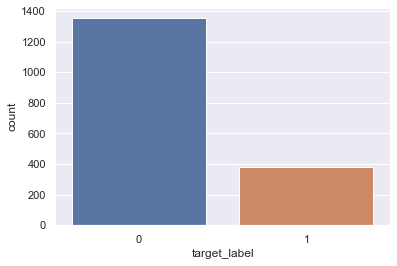

In [158]:
import seaborn as sns
sns.countplot(x='target_label', data = y)
plt.show()

The classes are imabalanced. The number of entries for class 1 381 and that for class 0 is 1353. Therefore I will use the SMOTE algorithm to create entries for the minority class. I will be using SMOTE only on the training data, because by oversampling only on the training data, none of the information in the test data is being used to create synthetic observations, therefore, no test data will be used for the model training.

#### USING SMOTE FOR OVERSAMPLING

In [270]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['target_label'])

#### Now we have a perfectly balanced data

In [271]:
os_data_y['target_label'].value_counts()

1    1003
0    1003
Name: target_label, dtype: int64

In [272]:
X_train, y_train = os_data_X, os_data_y

Text(0, 0.5, 'Second Principal Component')

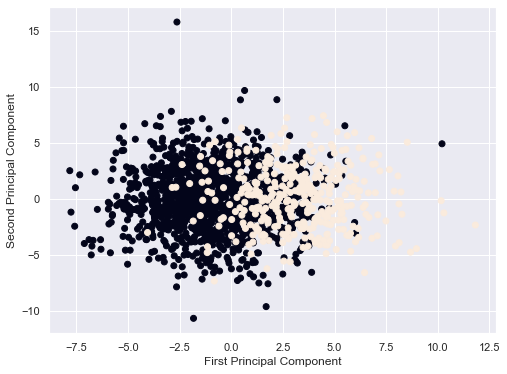

In [214]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
scaler.fit(X)
scaled_data=scaler.transform(X)
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1], c=y['target_label'])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

There is a good seperability among the 2 classes. Methods like SVM and KNN may perform better on the PCA data.

### LOGISTIC REGRESSION

In [257]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 1.000
Test set score: 0.924


/Users/nupuragrawal/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### Confusion Matrix

In [315]:
from sklearn.metrics import confusion_matrix
y_pred = logreg.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[345   5]
 [ 28  56]]


In [185]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       350
           1       0.92      0.67      0.77        84

    accuracy                           0.92       434
   macro avg       0.92      0.83      0.86       434
weighted avg       0.92      0.92      0.92       434



#### ROC CURVE

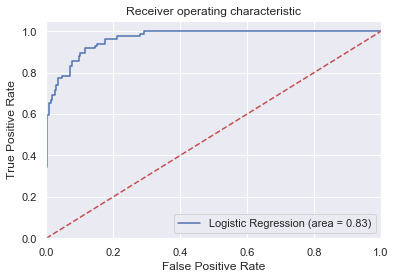

In [163]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Thus, logistic regression with a threshold value of 0.8 works best as it is a good trade-off between the false positive rate and true positive rate.

### k-nearest neighbours (Without PCA)

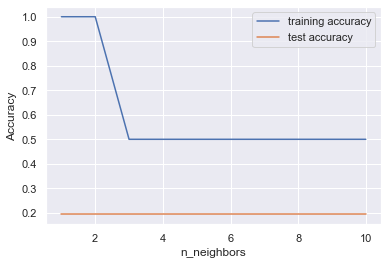

In [273]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train.values.ravel())
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train.values.ravel()))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test.values.ravel()))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [316]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train.values.ravel())
y_pred = knn.predict(X_test)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train.values.ravel())))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test.values.ravel())))
#print(classification_report(y_test, y_pred))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.19


### k-nearest neighbours (With PCA)


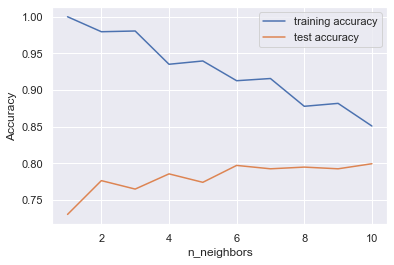

In [317]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
scaler = StandardScaler()
scaler.fit(X_train)
scaled_data=scaler.transform(X_train)
pca = PCA(n_components=100)
pca.fit(scaled_data)
x_pca_train=pca.transform(scaled_data)
scaled_data=scaler.transform(X_test)
pca = PCA(n_components=100)
pca.fit(scaled_data)
x_pca_test=pca.transform(scaled_data)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_pca_train,y_train.values.ravel())
    # record training set accuracy
    training_accuracy.append(knn.score(x_pca_train, y_train.values.ravel()))
    # record test set accuracy
    test_accuracy.append(knn.score(x_pca_test, y_test.values.ravel()))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [318]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_pca_train, y_train.values.ravel())
y_pred = knn.predict(x_pca_test)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(x_pca_train, y_train.values.ravel())))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(x_pca_test, y_test.values.ravel())))
print(classification_report(y_test, y_pred))

Accuracy of K-NN classifier on training set: 0.85
Accuracy of K-NN classifier on test set: 0.80
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       350
           1       0.00      0.00      0.00        84

    accuracy                           0.80       434
   macro avg       0.40      0.50      0.44       434
weighted avg       0.65      0.80      0.72       434



Thus we can observe there was a great improvement in the results of knn when we used it with the pca data. Also, the time taken for running the knn model with pca was in seconds. This is because KNN performs better with a fewer number of features as it suffers from the curse of dimensionality. The test accuracy was the highest(80%) for k=10 comapared to knn without pca, where the test accuracy was just 20%.

### Decision Tree Classifier

In [171]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.818


The accuracy on the train set is 100% while on the test set is 81%. It means the tree is overfitting. We can apply pruning and limit the depth of the tree to 3 to avoid overfitting.

In [319]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))
print(classification_report(y_test, y_pred))


Accuracy on training set: 0.840
Accuracy on test set: 0.889
              precision    recall  f1-score   support

           0       0.90      0.98      0.93       350
           1       0.85      0.52      0.65        84

    accuracy                           0.89       434
   macro avg       0.87      0.75      0.79       434
weighted avg       0.89      0.89      0.88       434



This leads to a decrease in train accuracy but a vast improvement in test accuracy.

### Random Forest

In [282]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train.values.ravel())
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train.values.ravel())))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test.values.ravel())))

Accuracy on training set: 1.000
Accuracy on test set: 0.806


We can tune the max_depth setting and see if the accuracy can be improved.

In [320]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf.fit(X_train, y_train.values.ravel())
y_pred = rf.predict(X_test)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train.values.ravel())))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test.values.ravel())))
print(classification_report(y_test, y_pred))

Accuracy on training set: 0.897
Accuracy on test set: 0.813
              precision    recall  f1-score   support

           0       0.81      1.00      0.90       350
           1       1.00      0.04      0.07        84

    accuracy                           0.81       434
   macro avg       0.91      0.52      0.48       434
weighted avg       0.85      0.81      0.74       434



The test accuracy did increase, but very slightly.

### Gradient Boosting

In [303]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train.values.ravel())
print("Accuracy on training set: {:.3f}".format(gb.score(X_train, y_train.values.ravel())))
print("Accuracy on test set: {:.3f}".format(gb.score(X_test, y_test.values.ravel())))

Accuracy on training set: 1.000
Accuracy on test set: 0.899


We are likely to be overfitting. To reduce overfitting, we could either apply stronger pre-pruning by limiting the maximum depth or lower the learning rate:

In [321]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=0, max_depth = 1)
gb.fit(X_train, y_train.values.ravel())
y_pred = gb.predict(X_test)
print("Accuracy on training set: {:.3f}".format(gb.score(X_train, y_train.values.ravel())))
print("Accuracy on test set: {:.3f}".format(gb.score(X_test, y_test.values.ravel())))
print(classification_report(y_test, y_pred))

Accuracy on training set: 0.929
Accuracy on test set: 0.896
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       350
           1       0.88      0.54      0.67        84

    accuracy                           0.90       434
   macro avg       0.89      0.76      0.80       434
weighted avg       0.90      0.90      0.89       434



In [286]:
gb2 = GradientBoostingClassifier(random_state=0, max_depth=1, learning_rate=0.01)
gb2.fit(X_train, y_train.values.ravel())
print("Accuracy on training set: {:.3f}".format(gb2.score(X_train, y_train.values.ravel())))
print("Accuracy on test set: {:.3f}".format(gb2.score(X_test, y_test.values.ravel())))

Accuracy on training set: 0.838
Accuracy on test set: 0.896


Both methods of decreasing the model complexity reduced the training set accuracy, as expected. However, in this case, none of these methods increased the generalization performance of the test set.

### Support Vector Machine(Without PCA)

In [322]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
svc = SVC()
svc.fit(X_train_scaled, y_train.values.ravel())
y_pred = svc.predict(X_test)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train.values.ravel())))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test.values.ravel())))
print(classification_report(y_test, y_pred))

Accuracy on training set: 1.00
Accuracy on test set: 0.81
              precision    recall  f1-score   support

           0       0.81      1.00      0.89       350
           1       1.00      0.01      0.02        84

    accuracy                           0.81       434
   macro avg       0.90      0.51      0.46       434
weighted avg       0.85      0.81      0.73       434



SVM requires all the features to vary on a similar scale. The model overfits quite substantially, with a perfect score on the training set and only 81% accuracy on the test set.

In [323]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train.values.ravel())
y_pred = svc.predict(X_test)
print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled,  y_train.values.ravel())))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled,  y_test.values.ravel())))
print(classification_report(y_test, y_pred))

Accuracy on training set: 1.000
Accuracy on test set: 0.841
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       350
           1       1.00      0.18      0.30        84

    accuracy                           0.84       434
   macro avg       0.92      0.59      0.61       434
weighted avg       0.87      0.84      0.79       434



Increasing C allows us to improve the model, resulting in 84.1% test set accuracy.

### Combining PCA and SVM

In [324]:
from sklearn.pipeline import Pipeline
from sklearn import decomposition
from sklearn import svm
from sklearn import metrics
clf = Pipeline([('pca', decomposition.PCA(n_components=150, whiten=True)),
                ('svm', svm.LinearSVC(C=1.0))])

clf.fit(X_train,  y_train.values.ravel())

y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_pred, y_test))
print(classification_report(y_test, y_pred))

print("Accuracy on training set: {:.3f}".format(
    clf.score(X_train,  y_train.values.ravel())))
print("Accuracy on test set: {:.3f}".format(clf.score(X_test,  y_test.values.ravel())))

[[332  26]
 [ 18  58]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       350
           1       0.76      0.69      0.72        84

    accuracy                           0.90       434
   macro avg       0.85      0.82      0.83       434
weighted avg       0.90      0.90      0.90       434

Accuracy on training set: 0.999
Accuracy on test set: 0.899


/Users/nupuragrawal/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Thus, combining SVM with PCA did increase the test accuracy substantially, as expected, as the seperability in the pca space is more clear.

### NEURAL NETWORK

In [337]:
import tensorflow as tf
from tensorflow import keras
from keras import backend as K

def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1score(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))




model = keras.Sequential([
    keras.layers.Flatten(input_shape=(6000,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', precision, recall,f1score])

model.fit(X_train, y_train, epochs=10, batch_size=1)

test_loss, test_acc, precision, recall, f1score = model.evaluate(X_test, y_test, verbose=0)


Train on 2006 samples
Epoch 1/10
2006/2006 [==============================] - 16s 8ms/sample - loss: 0.6959 - accuracy: 0.4960 - precision: 0.2956 - recall: 0.2956 - f1score: 0.2956
Epoch 2/10
2006/2006 [==============================] - 14s 7ms/sample - loss: 0.6733 - accuracy: 0.5628 - precision: 0.1117 - recall: 0.1117 - f1score: 0.1117
Epoch 3/10
2006/2006 [==============================] - 14s 7ms/sample - loss: 0.4221 - accuracy: 0.8485 - precision: 0.4073 - recall: 0.4073 - f1score: 0.4073
Epoch 4/10
2006/2006 [==============================] - 17s 9ms/sample - loss: 0.2092 - accuracy: 0.9616 - precision: 0.4766 - recall: 0.4766 - f1score: 0.4766
Epoch 5/10
2006/2006 [==============================] - 15s 7ms/sample - loss: 0.0974 - accuracy: 0.9925 - precision: 0.4945 - recall: 0.4945 - f1score: 0.4945
Epoch 6/10
2006/2006 [==============================] - 13s 6ms/sample - loss: 0.0691 - accuracy: 0.9880 - precision: 0.4920 - recall: 0.4920 - f1score: 0.4920
Epoch 7/10
2006/20

In [338]:
print('Test accuracy:', test_acc)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1score)

Test accuracy: 0.9032258
Precision: 0.76785713
Recall: 0.56964284
F1 Score: 0.64546025


### Comparing the performances of all the algorithms

In [339]:
tabs = [['Logistic Regression', 1.0, 0.924, 0.92, 0.99 ,0.95], ['k-nearest neighbours (Without PCA)', 1.0,0.19,0 , 0 ,0 ], ['k-nearest neighbours (With PCA)', 0.85,0.79,0.81,0.99 , 0.89 ],['Decision Tree Classifier',0.84,0.889,0.90 , 0.98 , 0.93 ],['Random Forest',0.897,0.813,0.81 , 1.00, 0.90  ],['Gradient Boosting',0.929,0.896,0.90 , 0.98 , 0.94],['Support Vector Machine(Without PCA)',1.0,0.81, 0.81, 1.00 , 0.89 ], ['Support Vector Machine(With PCA)',0.999,0.899, 0.93 , 0.95 , 0.94 ],['Neural Network',99.85 , 0.903,0.767,0.569,0.645]] 
df = pd.DataFrame(tabs, columns = ['Algorithm', 'Train Accuracy','Test Accuracy', 'Precision','Recall', 'F1-Score'])
df

,Algorithm,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,1.000,0.924,0.920,0.990,0.950
1,k-nearest neighbours (Without PCA),1.000,0.190,0.000,0.000,0.000
2,k-nearest neighbours (With PCA),0.850,0.790,0.810,0.990,0.890
3,Decision Tree Classifier,0.840,0.889,0.900,0.980,0.930
4,Random Forest,0.897,0.813,0.810,1.000,0.900
5,Gradient Boosting,0.929,0.896,0.900,0.980,0.940
6,Support Vector Machine(Without PCA),1.000,0.810,0.810,1.000,0.890
7,Support Vector Machine(With PCA),0.999,0.899,0.930,0.950,0.940
8,Neural Network,99.850,0.903,0.767,0.569,0.645


I calculated the prediction accuracy for different algorithms. The main objective is to learn a model that has a good generalization performance. Such a model maximizes the test accuracy. Therefore, I compared different algorithms and selected the best-performing one. Thus, after comparing various algorithms I  identified that Logistic regression is the best-suited algorithm for the problem, with a test accuracy of 0.92, precision value 0.92, recall value 0.99 and f1-score 0.95. In healthcare related scenarios, the precision values are more important than the accuracy, since someone with a false positive may undergo treatment for the disease he doesn't have which is likely to cause more harm. In that case too, Logistic regression performs the best as it has the highest values for precision and recall.